In [ ]:
!pip3 install opencv-python==4.6.0.66
!pip3 install numpy==1.23.4
!pip3 install Pillow==9.2.0

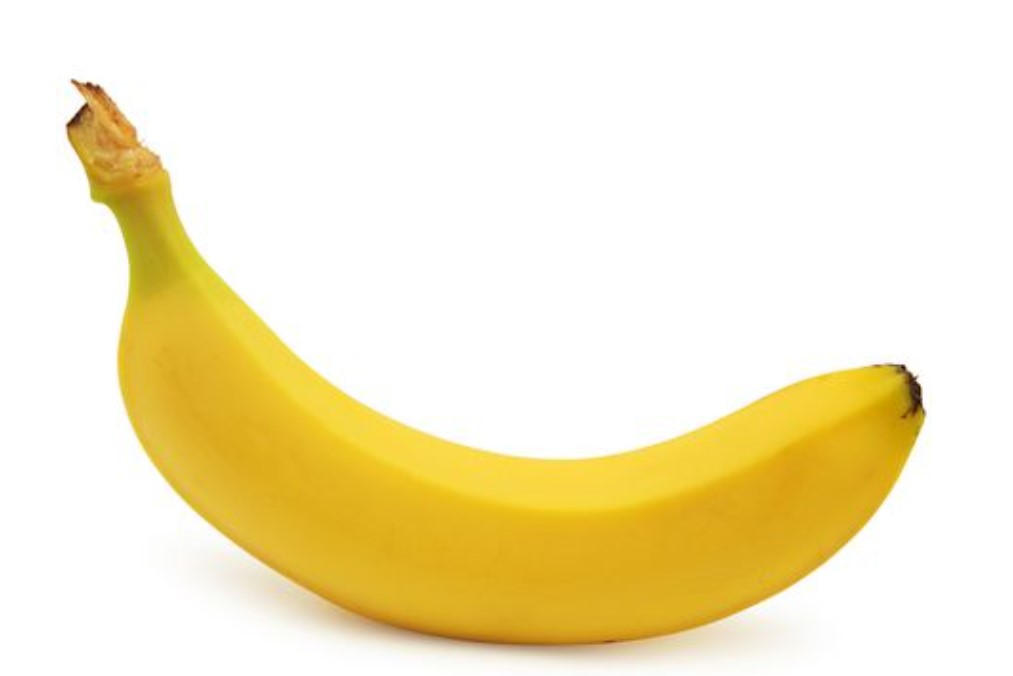

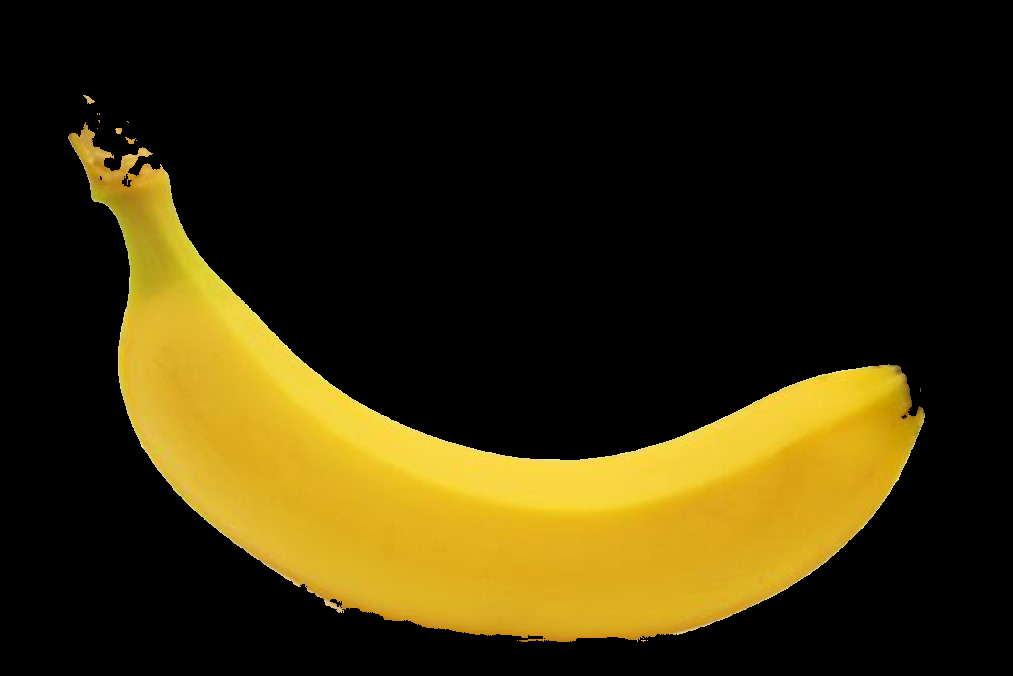

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit

# Define the yellow color in BGR (blue, green, red) format
yellow_bgr = (0, 255, 255)

# Get the lower and upper limits for the yellow color in HSV
lower_yellow, upper_yellow = get_limits(yellow_bgr)

# Load the image from file
image_path = '/content/banana.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a binary mask for the yellow color range
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Extract the yellow regions from the image using the mask
yellow_regions = cv2.bitwise_and(image, image, mask=yellow_mask)

# Display the original image and the yellow regions
cv2_imshow(image)
cv2_imshow(yellow_regions)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle hue wrap-around
    lowerLimit1 = np.array([hue - 10, 100, 100], dtype=np.uint8)
    upperLimit1 = np.array([hue + 10, 255, 255], dtype=np.uint8)

    # Handle hue wrap-around on the other side
    lowerLimit2 = np.array([hue - 10 + 180, 100, 100], dtype=np.uint8)
    upperLimit2 = np.array([hue + 10 + 180, 255, 255], dtype=np.uint8)

    return (lowerLimit1, upperLimit1), (lowerLimit2, upperLimit2)

    # Your get_limits function here...

def get_dominant_color(image, colors):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    color_counts = {}

    for color_name, bgr_color in colors.items():
        (lower1, upper1), (lower2, upper2) = get_limits(bgr_color)
        mask1 = cv2.inRange(hsv_image, lower1, upper1)
        mask2 = cv2.inRange(hsv_image, lower2, upper2)
        color_mask = mask1 + mask2
        color_counts[color_name] = cv2.countNonZero(color_mask)

    dominant_color = max(color_counts, key=color_counts.get)
    return dominant_color

# Define the color ranges in BGR (blue, green, red) format
colors = {
    'yellow': (0, 255, 255),
    'white': (255, 255, 255),
    'silver': (192, 192, 192),
    'grey': (128, 128, 128),
    'blue': (255, 0, 0),
    'red': (0, 0, 255),
    'black': (0, 0, 0),
    'brown': (0, 165, 255),
    'beige': (245, 245, 220)
}

# Load the image from file
image_path = '/content/1.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Get the dominant color name and the mask for the dominant color region
dominant_color_name = get_dominant_color(image, colors)
dominant_color_bgr = colors[dominant_color_name]
(lower1, upper1), (lower2, upper2) = get_limits(dominant_color_bgr)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv_image, lower1, upper1)
mask2 = cv2.inRange(hsv_image, lower2, upper2)
dominant_color_mask = mask1 + mask2

# Apply the mask to the image to isolate the dominant color region
dominant_color_region = cv2.bitwise_and(image, image, mask=dominant_color_mask)

# Display the dominant color name
print("Dominant Color: ", dominant_color_name.capitalize())

# Display the image and the masked dominant color region

cv2_imshow( dominant_color_region)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


# ***car***

**SVM**

In [ ]:
!pip3 install opencv-python
!pip3 install scikit-learn

Detected Car Color: Black


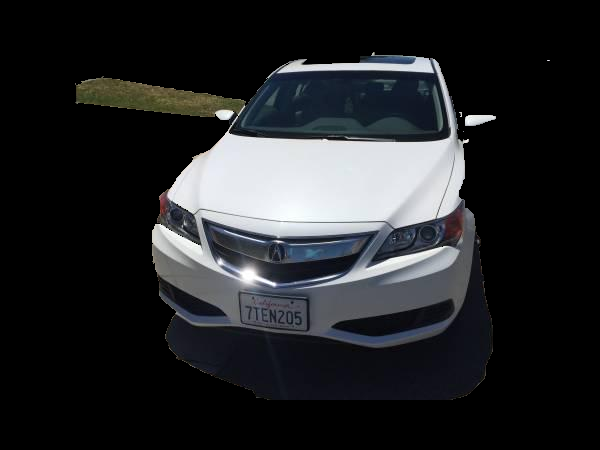

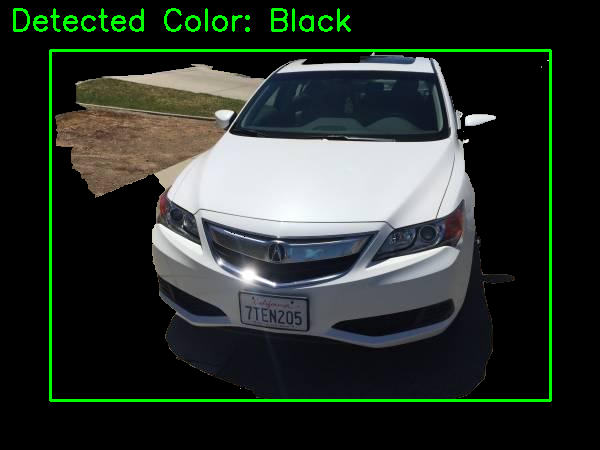

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow

# Function to extract B, G, and R color channels from an image
def extract_color_features(image):
    resized_image = cv2.resize(image, (100, 100))
    b, g, r = cv2.split(resized_image)
    return np.array([b.mean(), g.mean(), r.mean()])

# Function to perform GrabCut segmentation to isolate the car
def grabcut_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read the image.")
        return None

    # Create a mask and initialize it as background
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define the bounding rectangle enclosing the car region
    rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)

    # Perform GrabCut segmentation
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create a mask where the foreground is 1, and the background is 0 or 2
    car_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply the mask to isolate the car region
    car_region = cv2.bitwise_and(image, image, mask=car_mask)

    return car_region

# Function to detect the color of a car using SVM
def detect_car_color(image):
    # Extract features from the image
    features = extract_color_features(image)

    # Sample color data for training (example colors, you can add more)
    # Format: [B, G, R, Color]
    color_samples = np.array([
        [0, 255, 255, "Yellow"],
        [255, 255, 255, "White"],
        [192, 192, 192, "Silver"],
        [128, 128, 128, "Grey"],
        [255, 0, 0, "Blue"],
        [0, 0, 255, "Red"],
        [0, 0, 0, "Black"],
        [0, 165, 255, "Brown"],
        [245, 245, 220, "Beige"]
    ])

    # Split the samples into features (X) and labels (y)
    X = color_samples[:, :-1].astype(np.uint8)
    y = color_samples[:, -1]

    # Initialize the SVM classifier
    svm = SVC(kernel='linear')

    # Train the SVM classifier
    svm.fit(X, y)

    # Predict the color of the car in the image
    predicted_color = svm.predict([features.reshape(-1)])[0]

    return predicted_color

# Main function to test the car color detection
def main():
    image_path = '/content/123.jpg'  # Replace with the actual path to your image
    car_region = grabcut_segmentation(image_path)
    if car_region is not None:
        detected_color = detect_car_color(car_region)
        print("Detected Car Color:", detected_color.capitalize())

        # Display the car region
        cv2_imshow(car_region)

        # Load the original image
        original_image = cv2.imread(image_path)

        # Draw the bounding rectangle around the car region on the original image
        mask = np.zeros(original_image.shape[:2], np.uint8)
        rect = (50, 50, original_image.shape[1] - 100, original_image.shape[0] - 100)
        cv2.grabCut(original_image, mask, rect, None, None, 1, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        masked_original = cv2.bitwise_and(original_image, original_image, mask=mask2)
        cv2.rectangle(masked_original, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)

        # Display the original image with the bounding rectangle and detected color name
        cv2.putText(masked_original, f'Detected Color: {detected_color.capitalize()}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2_imshow(masked_original)

        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print("Car segmentation failed.")

if __name__ == "__main__":
    main()
